### Notebook to plot BOWTIE SeaSnake data.

Data is one-minute frequency.

James Ruppert
jruppert@ou.edu
8/29/24

### Main settings

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
import subprocess, cmocean
import pandas as pd
import xarray as xr
import seaborn as sns
from bowtie_read_data import *

#### Read data

In [6]:
snakedat = read_snake_files()
dship = read_dship()

#### Set missing data for strange values

In [7]:
# Some funky lines made it through
snakedat[4] = pd.to_numeric(snakedat[4], errors='coerce')
# Some SST values appearing large
snakedat[snakedat[4] > 200] = pd.NA

---
### Plotting routines

#### Plot functions

In [8]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

sns.set_theme(style="darkgrid", rc={'xtick.bottom': True, 'ytick.left': True,})
# sns.set_theme(style="deep")
# plt.style.use('seaborn-v0_8-dark-palette')
# sns.set_theme(style="ticks")
# sns.set_theme(style="white")
# sns.set_theme(style="dark")

In [9]:
def do_smooth(invar, nt_smooth=10):
    invar_df = pd.DataFrame(invar)
    return invar_df.rolling(window=nt_smooth, center=True, closed='both', min_periods=3).mean()

In [10]:
def plot_time_series(figdata):

    fig_x = 6
    fig_y = 3.5
    fig, ax = plt.subplots(figsize=(fig_x,fig_y), layout="constrained",) # row, column

    ax.set_title(figdata['fig_title'])

    ax.set_ylabel(figdata['units_sst'])
    ax.set_xlabel('Date [UTC]')
    ax.set_xlim(figdata['xlim'])
    # ax.set_ylim((26,32))

    ax.grid(True, axis='x')#, color='0.55', linewidth=0.5)
    ax.grid(True, axis='y')#, color='0.55', linewidth=0.5)

    # Plot variable
    # if smooth:
    #     im = ax.plot(figdata['time_snake'], figdata['snake_sst'], linewidth=1.5, color='gray', label='Raw')
    #     nsmooth=20
    #     pltvar_sm = do_smooth(figdata['snake_sst'], nt_smooth=nsmooth)
    #     im = ax.plot(figdata['time_snake'], pltvar_sm, linewidth=1.0, color='red', label=str(nsmooth)+'-min smoothed')
    #     nsmooth=60*3
    #     pltvar_sm = do_smooth(figdata['snake_sst'], nt_smooth=nsmooth)
    #     im = ax.plot(figdata['time_snake'], pltvar_sm, linewidth=1.0, color='yellow', label=str(int(nsmooth/60))+'-hr smoothed')
    # else:
    linewidth=1.5
    nsmooth=30 # Minutes
    sst = do_smooth(figdata['thermo_sst'], nt_smooth=nsmooth)
    ax.plot(figdata['time_dship'], sst, label='Thermosal-extern', linewidth=linewidth)
    # sst = do_smooth(figdata['station_sst'], nt_smooth=nsmooth)
    # ax.plot(figdata['time_dship'], sst, label='Station', linewidth=linewidth)
    sst = do_smooth(figdata['snake_sst'], nt_smooth=nsmooth)
    ax.plot(figdata['time_snake'], sst, label='Snake', linewidth=linewidth)

    ax2 = ax.twinx()
    # ax2.plot(figdata['time_dship'], figdata['snake_sst'] - figdata['thermo_sst'], label='Snake', linewidth=linewidth)
    linewidth=1
    # wspd = figdata['wspd']
    wspd = do_smooth(figdata['wspd'], nt_smooth=nsmooth)
    ax2.plot(figdata['time_dship'], wspd, label='Wind speed', color='black', linewidth=linewidth, zorder=0)
    ax2.set_ylabel(figdata['units_var2'])

    ax.legend(fontsize=10, loc='upper left')#frameon=False)
    ax2.legend(fontsize=10, loc='upper right')#frameon=False)

    ax2.grid(visible=False)#, axis='x')

    # Time labels
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    plt.show()
    plt.close()
    return

#### Time series

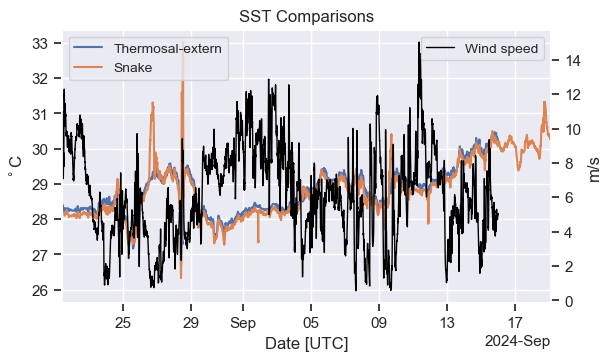

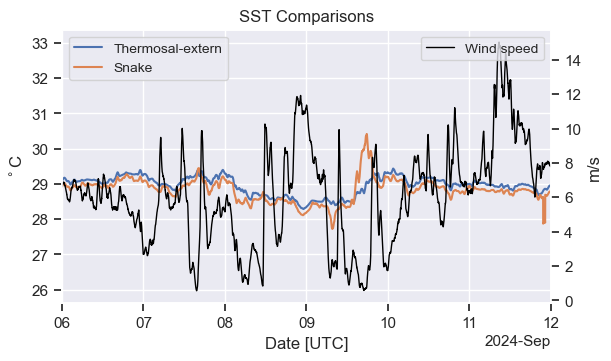

In [21]:
xlim = (snakedat[0].iloc[0], snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), np.datetime64('2024-08-27T12'))

figdata = {
    'fig_title': 'SST Comparisons',
    'snake_sst': snakedat[4],
    'time_snake': snakedat[0],
    'units_sst': r'$^\circ$C',
    # 'station_sst': sst1-273.15,
    'thermo_sst': dship['sst3']-273.15,
    'wspd': dship['wspd'],
    'units_var2': 'm/s',
    'time_dship': dship['time'],
    # 'units2': r'$^\circ$C',
    'xlim': xlim,
           }

plot_time_series(figdata)

# xlim = (np.datetime64('2024-09-03T00'), snakedat[0].iloc[-1])
xlim = (np.datetime64('2024-09-10T00'), snakedat[0].iloc[-1])
xlim = (np.datetime64('2024-09-10T00'), np.datetime64('2024-09-16T00'))
xlim = (np.datetime64('2024-09-01T00'), np.datetime64('2024-09-09T00'))
xlim = (np.datetime64('2024-09-01T00'), snakedat[0].iloc[-1])
xlim = (np.datetime64('2024-09-06T00'), np.datetime64('2024-09-12T00'))
figdata['xlim']=xlim
plot_time_series(figdata)